**Mounting Google-Drive:** 

First of all we must mount our drive

In [1]:
!unzip /content/LayoutLM_model_4Z89mdt.zip -d layoutlm_train

Archive:  /content/LayoutLM_model_4Z89mdt.zip
 extracting: layoutlm_train/59d5e384-7a40-4a99-8ab5-2d4f98129abe\59d5e384-7a40-4a99-8ab5-2d4f98129abe_box.txt  
 extracting: layoutlm_train/59d5e384-7a40-4a99-8ab5-2d4f98129abe\59d5e384-7a40-4a99-8ab5-2d4f98129abe_image.txt  
 extracting: layoutlm_train/59d5e384-7a40-4a99-8ab5-2d4f98129abe\59d5e384-7a40-4a99-8ab5-2d4f98129abe.txt  
 extracting: layoutlm_train/59d5e384-7a40-4a99-8ab5-2d4f98129abe\59d5e384-7a40-4a99-8ab5-2d4f98129abe_labels.txt  
 extracting: layoutlm_train/59d5e384-7a40-4a99-8ab5-2d4f98129abe\CALOSA-2021_01269962_Page1.png_2022-03-24_202441.0_image_0.jpg  
 extracting: layoutlm_train/59d5e384-7a40-4a99-8ab5-2d4f98129abe\FLPINE-20128-01975_Page0.png_2022-03-24_202539.2_image_0.jpg  
 extracting: layoutlm_train/59d5e384-7a40-4a99-8ab5-2d4f98129abe\FLPINE-20128-01889_Page0.png_2022-03-24_202526.6_image_0.jpg  
 extracting: layoutlm_train/59d5e384-7a40-4a99-8ab5-2d4f98129abe\FLPINE-20129-01188_Page0.png_2022-03-24_202725.2_image

In [2]:
!unzip /content/LAYOUT_LM_TEST.zip -d layoutlm_test

Archive:  /content/LAYOUT_LM_TEST.zip
 extracting: layoutlm_test/767cb324-62f6-42ff-a18b-aa0fa7a7f683\767cb324-62f6-42ff-a18b-aa0fa7a7f683_image.txt  
 extracting: layoutlm_test/767cb324-62f6-42ff-a18b-aa0fa7a7f683\767cb324-62f6-42ff-a18b-aa0fa7a7f683_box.txt  
 extracting: layoutlm_test/767cb324-62f6-42ff-a18b-aa0fa7a7f683\767cb324-62f6-42ff-a18b-aa0fa7a7f683.txt  
 extracting: layoutlm_test/767cb324-62f6-42ff-a18b-aa0fa7a7f683\767cb324-62f6-42ff-a18b-aa0fa7a7f683_labels.txt  
 extracting: layoutlm_test/767cb324-62f6-42ff-a18b-aa0fa7a7f683\FLPINE-20107-00302_Page0.png_2022-03-26_103051.2_image_0.jpg  
 extracting: layoutlm_test/767cb324-62f6-42ff-a18b-aa0fa7a7f683\FLPINE-20128-02370_Page0.png_2022-03-26_103011.9_image_0.jpg  
 extracting: layoutlm_test/767cb324-62f6-42ff-a18b-aa0fa7a7f683\FLPINE-20128-02340_Page0.png_2022-03-26_103009.3_image_0.jpg  
 extracting: layoutlm_test/767cb324-62f6-42ff-a18b-aa0fa7a7f683\FLPINE-20107-00329_Page0.png_2022-03-26_103058.8_image_0.jpg  
 extracti

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install libraries:**


In [1]:
! rm -r unilm
! git clone -b remove_torch_save https://github.com/NielsRogge/unilm.git
! cd unilm/layoutlm
! pip install unilm/layoutlm

Cloning into 'unilm'...
remote: Enumerating objects: 4248, done.
remote: Counting objects: 100% (4248/4248), done.
remote: Compressing objects: 100% (2202/2202), done.
remote: Total 4248 (delta 2085), reused 3591 (delta 1889), pack-reused 0
Receiving objects: 100% (4248/4248), 7.29 MiB | 14.92 MiB/s, done.
Resolving deltas: 100% (2085/2085), done.
Processing ./unilm/layoutlm
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for layoutlm: filename=layoutlm-0.0-py3-none-any.whl size=11487 sha256=c87a312d121bc87eb5ac73eee7abe80465e691afb53a9ad6befa189c25d834f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-gcsic4v5/wheels/ce/83/11

In [2]:
! rm -r transformers
! git clone https://github.com/huggingface/transformers.git
! cd transformers
! pip install ./transformers

Cloning into 'transformers'...
remote: Enumerating objects: 107416, done.
remote: Total 107416 (delta 0), reused 0 (delta 0), pack-reused 107416
Receiving objects: 100% (107416/107416), 93.71 MiB | 13.71 MiB/s, done.
Resolving deltas: 100% (78251/78251), done.
Processing ./transformers
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached tokenizers-0.11.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (6.5 MB)
  Created wheel for transformers: filename=transformers-4.18.0.dev0-py3-none-any.whl size=3

In [7]:
from torch.nn import CrossEntropyLoss

def get_labels(path):
    with open(path, "r") as f:
        labels = f.read().splitlines()
    if "O" not in labels:
        labels = ["O"] + labels
    return labels

labels = get_labels("/content/train/59d5e384-7a40-4a99-8ab5-2d4f98129abe_labels.txt")
num_labels = len(labels)
label_map = {i: label for i, label in enumerate(labels)}
# Use cross entropy ignore index as padding label id so that only real label ids contribute to the loss later
pad_token_label_id = CrossEntropyLoss().ignore_index

In [9]:
label_map

{0: 'B-ADDRESS_1',
 1: 'B-ADDRESS_2',
 2: 'B-ADDRESS_3',
 3: 'B-PARTY_ID_CODE_1',
 4: 'B-PARTY_ID_CODE_2',
 5: 'B-PARTY_NAME_1',
 6: 'B-PARTY_NAME_2',
 7: 'B-PARTY_NAME_3',
 8: 'B-ROLE_1',
 9: 'E-ADDRESS_1',
 10: 'E-ADDRESS_2',
 11: 'E-ADDRESS_3',
 12: 'E-PARTY_ID_CODE_1',
 13: 'E-PARTY_ID_CODE_2',
 14: 'E-PARTY_NAME_1',
 15: 'E-PARTY_NAME_2',
 16: 'E-PARTY_NAME_3',
 17: 'E-ROLE_1',
 18: 'I-ADDRESS_1',
 19: 'I-ADDRESS_2',
 20: 'I-ADDRESS_3',
 21: 'I-PARTY_ID_CODE_1',
 22: 'I-PARTY_ID_CODE_2',
 23: 'I-PARTY_NAME_1',
 24: 'I-PARTY_NAME_2',
 25: 'I-PARTY_NAME_3',
 26: 'O',
 27: 'S-PARTY_ID_CODE_1',
 28: 'S-PARTY_ID_CODE_2',
 29: 'S-PARTY_ID_CODE_3',
 30: 'S-ROLE_1',
 31: 'S-ROLE_2',
 32: 'S-ROLE_3'}

In [23]:
from transformers import LayoutLMTokenizer
from layoutlm.data.funsd import FunsdDataset, InputFeatures
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

args = {'local_rank': -1,
        'overwrite_cache': True,
        'data_dir': '/content/train',
        'model_name_or_path':'microsoft/layoutlm-base-uncased',
        'max_seq_length': 512,
        'model_type': 'layoutlm',}

# class to turn the keys of a dict into attributes (thanks Stackoverflow)
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

args = AttrDict(args)

tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

# the LayoutLM authors already defined a specific FunsdDataset, so we are going to use this here
train_dataset = FunsdDataset(args, tokenizer, labels, pad_token_label_id, mode="train")
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset,
                              sampler=train_sampler,
                              batch_size=8)

eval_dataset = FunsdDataset(args, tokenizer, labels, pad_token_label_id, mode="test")
eval_sampler = SequentialSampler(eval_dataset)
eval_dataloader = DataLoader(eval_dataset,
                             sampler=eval_sampler,
                            batch_size=2)



In [24]:
batch = next(iter(train_dataloader))
input_ids = batch[0][0]
tokenizer.decode(input_ids)

'[CLS] i # : 2018224859 bk : 20129 pg : 402, 07 / 16 / 2018 at 02 : 04 pm, recording 18 pages $ 154. 50 m doc stamp collection $ 367. 50 intangible tax $ 210. 00 ken burke, clerk of court and comptroller pinellas county,, fl by deputy clerk : clk100781 3 ( space above this line for recording data ) loan number : 113483013 min : 100094221134830139 mortgage definitions. words used in multiple sections of this document are defined below and other words are defined in sections 3, 11, 13, 18, 20 and 21. certain rules regarding the usage of words used in this document are also provided in section 16. ( a ) " security instrument " means this document, which is dated july 10, 2018, together with all riders to this document. ( b ) " borrower " is cheryl bradbury, whose address is 2134 serpentine circle s, st petersburg, florida 33712, and eric bradbury, wife and husband, whose address is 2134 serpintine circle s, saint petersburg, florida 33712, who is / are the mortgagor ( s ) under this secur

In [25]:
from transformers import LayoutLMForTokenClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForTokenClassification.from_pretrained("microsoft/layoutlm-base-uncased", num_labels=num_labels)
model.to(device)

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

LayoutLMForTokenClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0): LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
         

In [26]:

from transformers import LayoutLMTokenizer
from layoutlm.data.funsd import FunsdDataset, InputFeatures
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

**Start Training**

In [29]:
from transformers import AdamW
from tqdm import tqdm

optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 20
t_total = len(train_dataloader) * num_train_epochs # total number of training steps 

#put the model in training mode
model.train()
for epoch in range(num_train_epochs):
  for batch in tqdm(train_dataloader, desc="Training"):
      input_ids = batch[0].to(device)
      bbox = batch[4].to(device)
      attention_mask = batch[1].to(device)
      token_type_ids = batch[2].to(device)
      labels = batch[3].to(device)

      # forward pass
      outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids,
                      labels=labels)
      loss = outputs.loss

      # print loss every 100 steps
      if global_step % 100 == 0:
        print(f"Loss after {global_step} steps: {loss.item()}")

      # backward pass to get the gradients 
      loss.backward()

      #print("Gradients on classification head:")
      #print(model.classifier.weight.grad[6,:].sum())

      # update
      optimizer.step()
      optimizer.zero_grad()
      global_step += 1

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
Training:   0%|          | 0/15 [00:00<?, ?it/s]

Loss after 0 steps: 0.026747064664959908


Training:  67%|██████▋   | 10/15 [00:16<00:08,  1.60s/it]

Loss after 100 steps: 0.0035663871094584465


Training:  33%|███▎      | 5/15 [00:07<00:16,  1.60s/it]

Loss after 200 steps: 0.0010829007951542735


Training: 100%|██████████| 15/15 [00:24<00:00,  1.61s/it]


## Evaluation

Now let's evaluate on the test set:

In [30]:
import numpy as np
from seqeval.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)

eval_loss = 0.0
nb_eval_steps = 0
preds = None
out_label_ids = None

# put model in evaluation mode
model.eval()
for batch in tqdm(eval_dataloader, desc="Evaluating"):
    with torch.no_grad():
        input_ids = batch[0].to(device)
        bbox = batch[4].to(device)
        attention_mask = batch[1].to(device)
        token_type_ids = batch[2].to(device)
        labels = batch[3].to(device)

        # forward pass
        outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids,
                        labels=labels)
        # get the loss and logits
        tmp_eval_loss = outputs.loss
        logits = outputs.logits

        eval_loss += tmp_eval_loss.item()
        nb_eval_steps += 1

        # compute the predictions
        if preds is None:
            preds = logits.detach().cpu().numpy()
            out_label_ids = labels.detach().cpu().numpy()
        else:
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(
                out_label_ids, labels.detach().cpu().numpy(), axis=0
            )

# compute average evaluation loss
eval_loss = eval_loss / nb_eval_steps
preds = np.argmax(preds, axis=2)

out_label_list = [[] for _ in range(out_label_ids.shape[0])]
preds_list = [[] for _ in range(out_label_ids.shape[0])]

for i in range(out_label_ids.shape[0]):
    for j in range(out_label_ids.shape[1]):
        if out_label_ids[i, j] != pad_token_label_id:
            out_label_list[i].append(label_map[out_label_ids[i][j]])
            preds_list[i].append(label_map[preds[i][j]])

results = {
    "loss": eval_loss,
    "precision": precision_score(out_label_list, preds_list),
    "recall": recall_score(out_label_list, preds_list),
    "f1": f1_score(out_label_list, preds_list),
}
print(results)

Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]

{'loss': 0.08794586632866412, 'precision': 0.85, 'recall': 0.912751677852349, 'f1': 0.8802588996763754}


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
PATH='/content/drive/MyDrive/layoutlm.pt'
torch.save(model.state_dict(), PATH)

In [21]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,653 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [4]:
!git clone https://github.com/UBIAI/layout_lm_tutorial.git

Cloning into 'layout_lm_tutorial'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [41]:
import sys
sys.path.insert(1, './drive/MyDrive/layoutlm')
from layoutlm_preprocess import *
image_path='/content/FLPINE-20128-02340_Page0.png_2022-03-26_103009.3_image_0.jpg'
image, words, boxes, actual_boxes = preprocess(image_path)

In [42]:
model_path='/content/drive/MyDrive/layoutlm.pt'
model=model_load(model_path,num_labels)
word_level_predictions, final_boxes=convert_to_features(image, words, boxes, actual_boxes, model)

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,

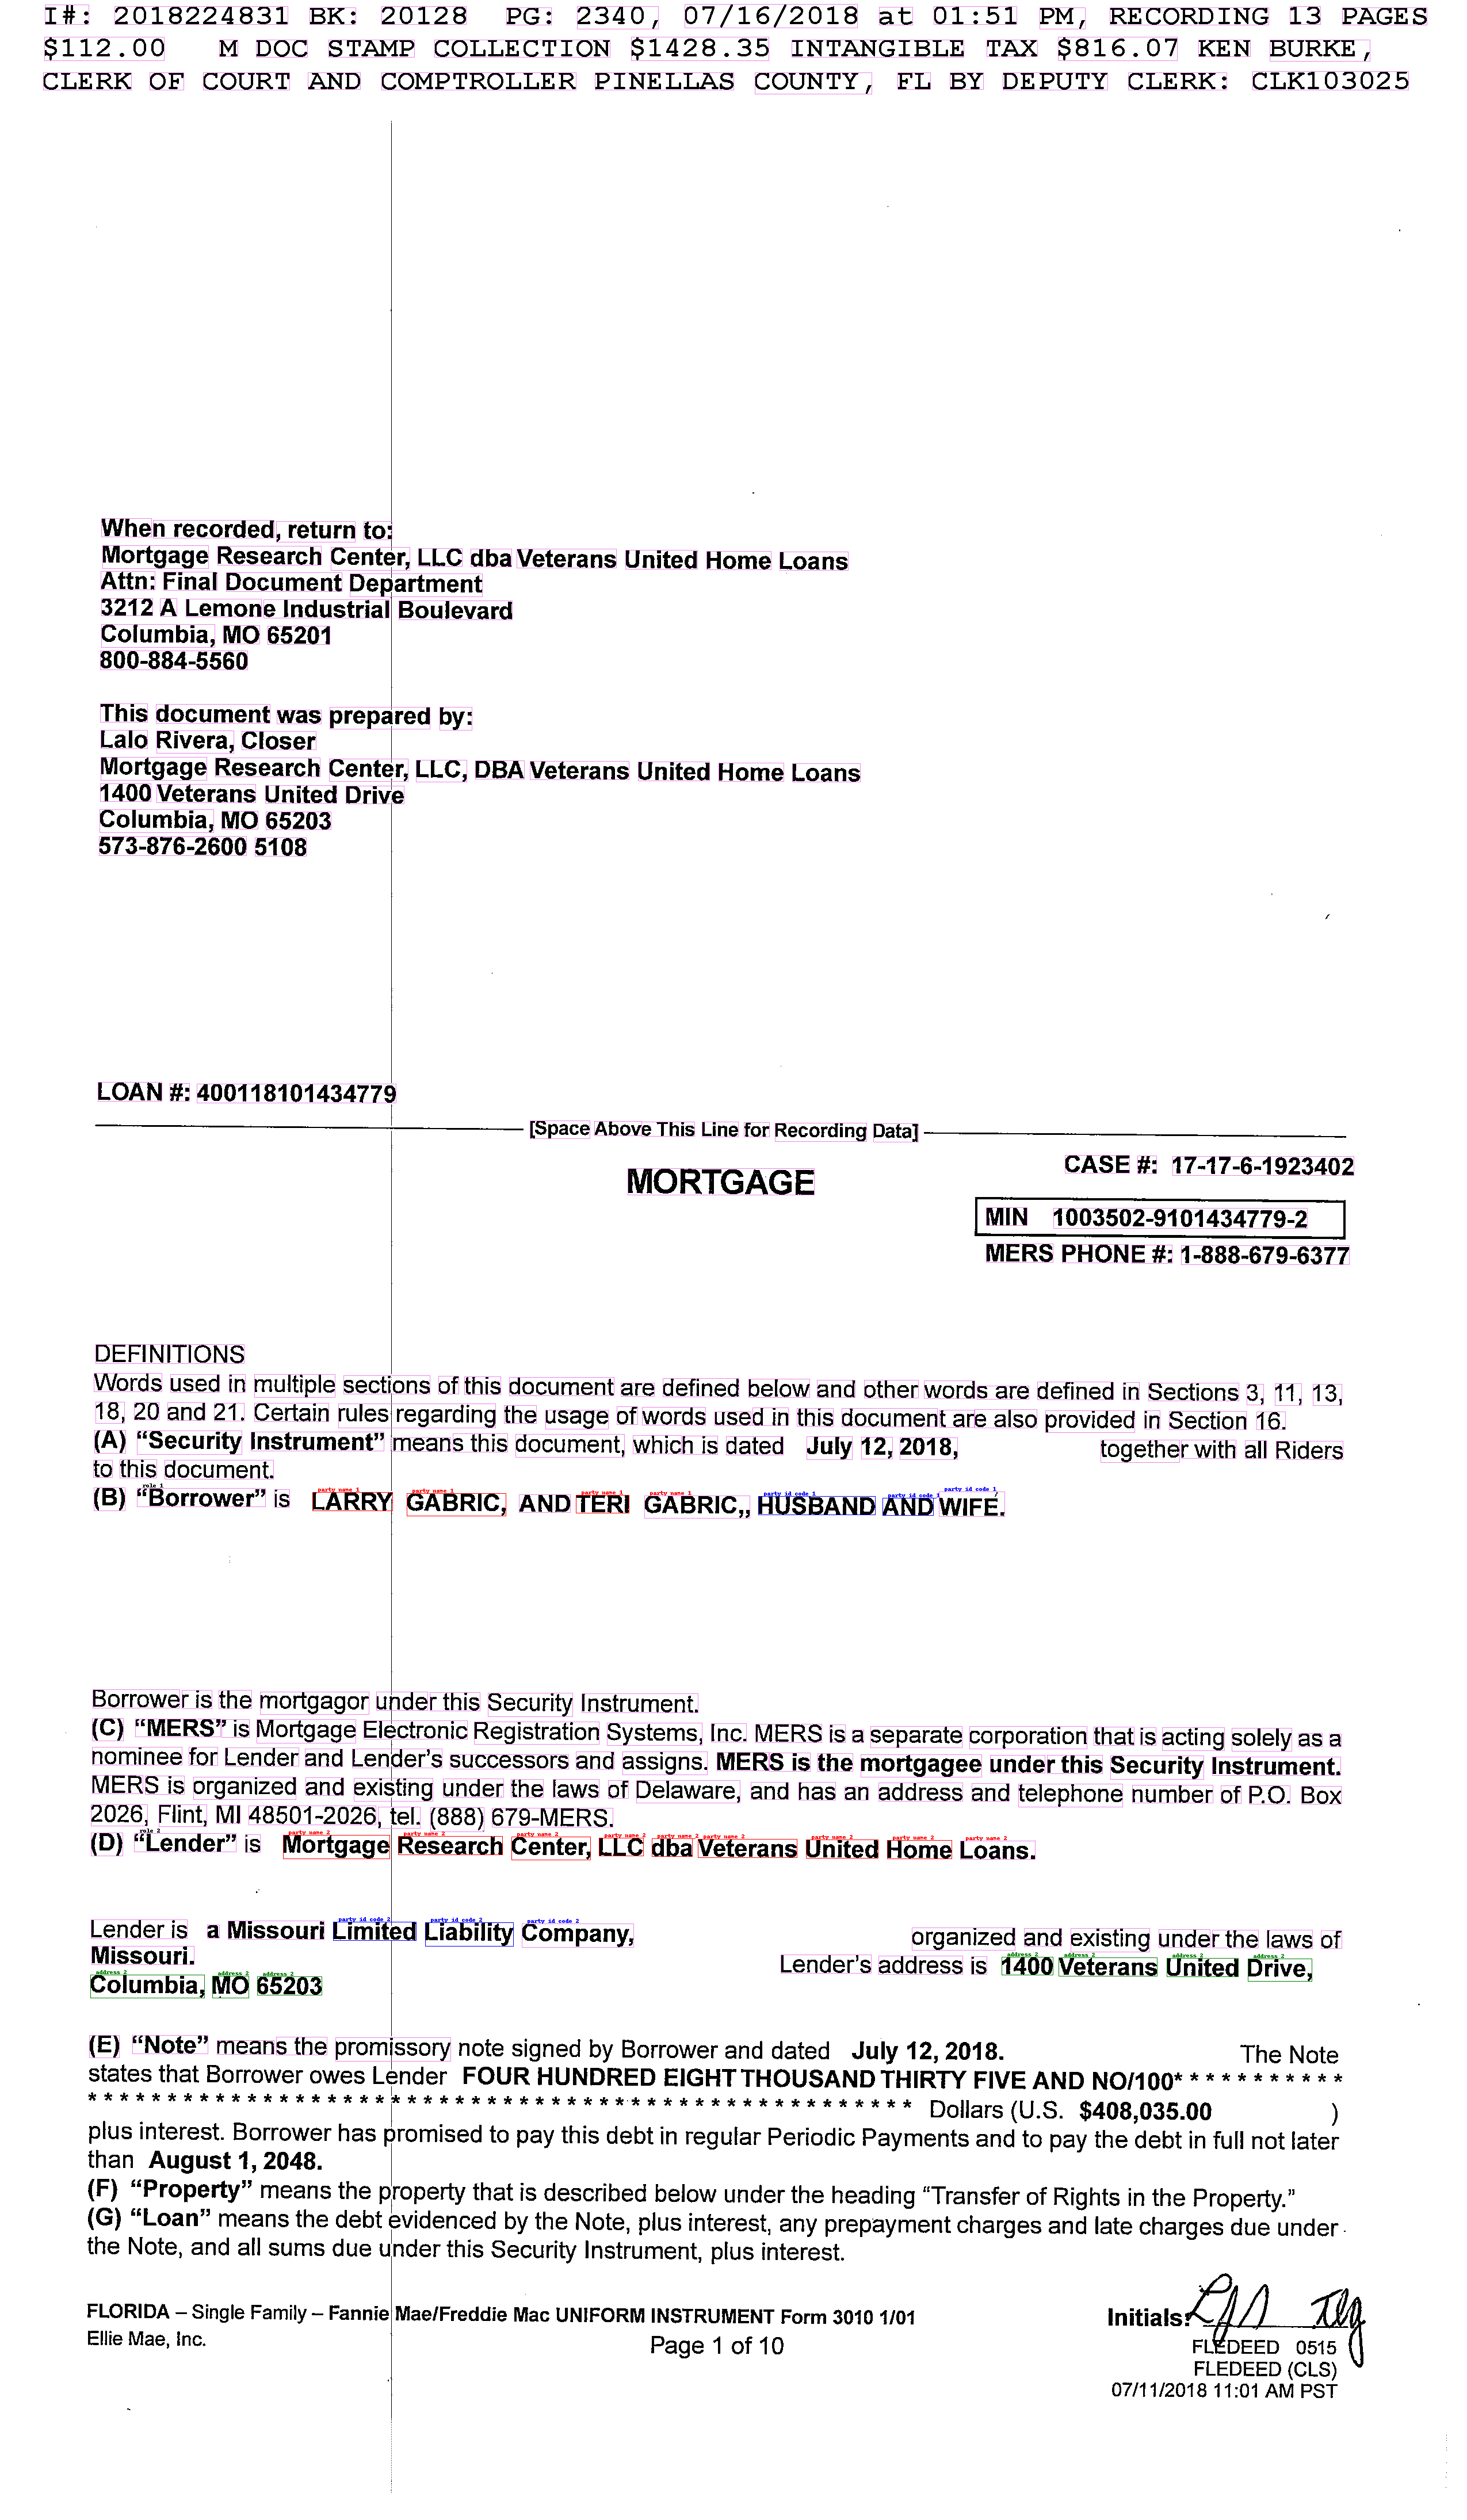

In [43]:
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
def iob_to_label(label):
  if label != 'O':
    return label[2:]
  else:
    return ""
label2color = {'ADDRESS_1':'green','ADDRESS_2':'green','ADDRESS_3':'green','PARTY_ID_CODE_1':'blue','PARTY_ID_CODE_2':'blue','PARTY_ID_CODE_3':'blue','ROLE_1':'black','ROLE_2':'black','ROLE_3':'black','PARTY_NAME_1':'red','PARTY_NAME_2':'red','PARTY_NAME_3':'red','':'violet'}
label2color =  {k.lower(): v for k, v in label2color.items()}
for prediction, box in zip(word_level_predictions, final_boxes):
    predicted_label = iob_to_label(label_map[prediction]).lower()
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)
image

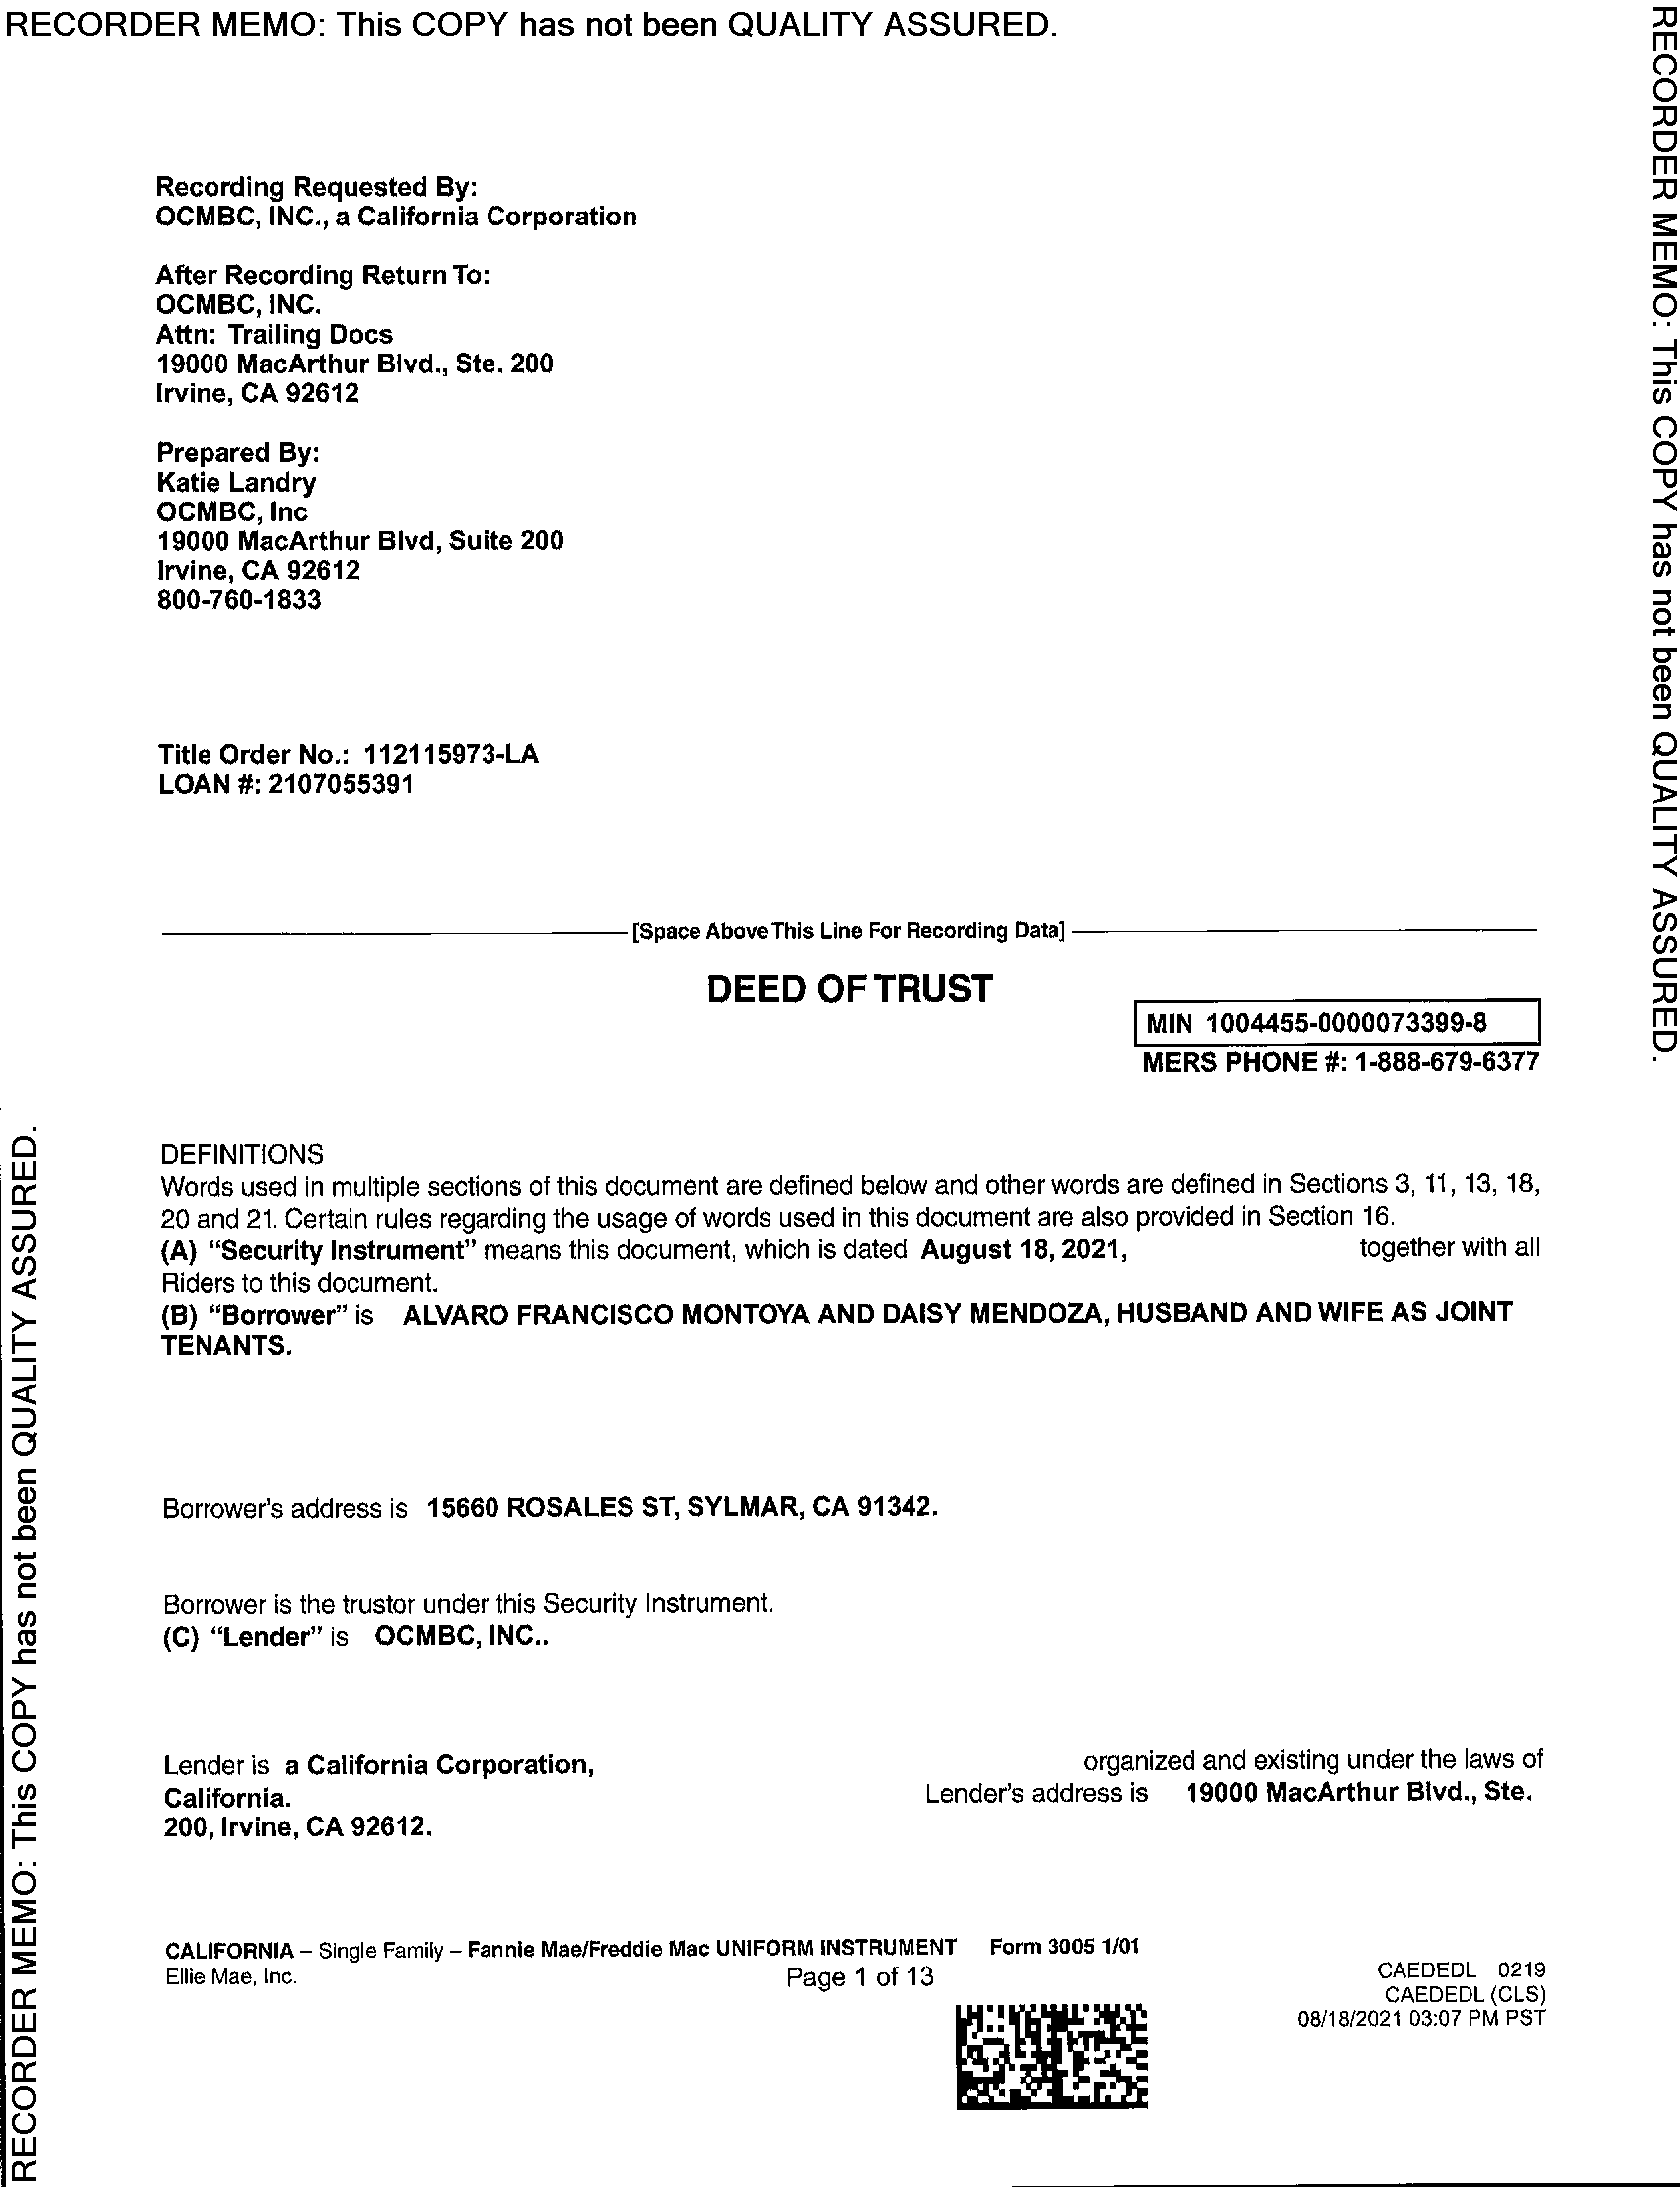

In [1]:
import pytesseract
from PIL import Image, ImageDraw, ImageFont

#image = Image.open('/content/form_example.jpg')
image = Image.open("/content/CALOSA-2021_01288002_Page2.png_2022-03-26_103041.5_image_0.jpg")
image = image.convert("RGB")
image

In [2]:
import numpy as np

width, height = image.size
w_scale = 1000/width
h_scale = 1000/height

ocr_df = pytesseract.image_to_data(image, output_type='data.frame') \
            
ocr_df = ocr_df.dropna() \
               .assign(left_scaled = ocr_df.left*w_scale,
                       width_scaled = ocr_df.width*w_scale,
                       top_scaled = ocr_df.top*h_scale,
                       height_scaled = ocr_df.height*h_scale,
                       right_scaled = lambda x: x.left_scaled + x.width_scaled,
                       bottom_scaled = lambda x: x.top_scaled + x.height_scaled)

float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
ocr_df = ocr_df.dropna().reset_index(drop=True)
ocr_df[:20]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,left_scaled,width_scaled,top_scaled,height_scaled,right_scaled,bottom_scaled
0,5,1,1,1,1,1,7,12,194,24,96,RECORDER,4,115,5,11,119,16
1,5,1,1,1,1,2,215,12,102,24,94,MEMO:,127,60,5,11,187,16
2,5,1,1,1,1,3,322,12,82,24,95,This,190,48,5,11,239,16
3,5,1,1,1,1,4,416,12,72,24,96,COPY,246,43,5,11,288,16
4,5,1,1,1,1,5,490,12,69,24,95,has,290,41,5,11,330,16
5,5,1,1,1,1,6,562,14,75,22,95,not,332,44,6,10,376,16
6,5,1,1,1,1,7,649,12,72,24,96,been,384,43,5,11,426,16
7,5,1,1,1,1,8,734,12,145,25,96,QUALITY,434,86,5,11,520,17
8,5,1,1,1,1,9,890,12,174,24,96,ASSURED.,526,103,5,11,629,16
9,5,1,2,1,1,1,12,2002,24,194,96,RECORDER,7,14,909,88,21,997


In [3]:
len(ocr_df)

240

In [4]:
words = list(ocr_df.text)
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
  x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
  actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+widght, top+height) to get the actual box 
  actual_boxes.append(actual_box)

def normalize_box(box, width, height):
    return [
        int(1000 * (box[0] / width)),
        int(1000 * (box[1] / height)),
        int(1000 * (box[2] / width)),
        int(1000 * (box[3] / height)),
    ]

boxes = []
for box in actual_boxes:
  boxes.append(normalize_box(box, width, height))
boxes

[[4, 5, 118, 16],
 [127, 5, 187, 16],
 [190, 5, 238, 16],
 [245, 5, 288, 16],
 [289, 5, 330, 16],
 [332, 6, 376, 16],
 [383, 5, 426, 16],
 [433, 5, 519, 16],
 [526, 5, 628, 16],
 [7, 909, 21, 997],
 [7, 855, 21, 902],
 [7, 815, 21, 853],
 [7, 777, 21, 810],
 [7, 745, 21, 776],
 [8, 709, 21, 743],
 [7, 671, 21, 704],
 [7, 599, 21, 665],
 [7, 515, 21, 594],
 [93, 80, 168, 92],
 [175, 80, 253, 92],
 [260, 80, 283, 92],
 [92, 94, 151, 103],
 [152, 94, 195, 105],
 [199, 96, 208, 103],
 [213, 94, 284, 103],
 [290, 94, 378, 105],
 [92, 120, 129, 130],
 [134, 120, 209, 132],
 [216, 121, 265, 130],
 [269, 120, 290, 129],
 [93, 134, 151, 143],
 [153, 134, 190, 145],
 [92, 148, 127, 157],
 [135, 148, 190, 159],
 [196, 148, 234, 157],
 [93, 161, 135, 170],
 [141, 161, 219, 170],
 [225, 161, 265, 172],
 [271, 161, 299, 170],
 [304, 161, 329, 170],
 [93, 175, 138, 185],
 [144, 174, 165, 184],
 [170, 174, 213, 184],
 [93, 201, 160, 213],
 [166, 202, 189, 213],
 [93, 215, 130, 225],
 [137, 215, 187, 2

In [5]:
def convert_example_to_features(image, words, boxes, actual_boxes, tokenizer, args, cls_token_box=[0, 0, 0, 0],
                                 sep_token_box=[1000, 1000, 1000, 1000],
                                 pad_token_box=[0, 0, 0, 0]):
      width, height = image.size

      tokens = []
      token_boxes = []
      actual_bboxes = [] # we use an extra b because actual_boxes is already used
      token_actual_boxes = []
      for word, box, actual_bbox in zip(words, boxes, actual_boxes):
          word_tokens = tokenizer.tokenize(word)
          tokens.extend(word_tokens)
          token_boxes.extend([box] * len(word_tokens))
          actual_bboxes.extend([actual_bbox] * len(word_tokens))
          token_actual_boxes.extend([actual_bbox] * len(word_tokens))

      # Truncation: account for [CLS] and [SEP] with "- 2". 
      special_tokens_count = 2 
      if len(tokens) > args.max_seq_length - special_tokens_count:
          tokens = tokens[: (args.max_seq_length - special_tokens_count)]
          token_boxes = token_boxes[: (args.max_seq_length - special_tokens_count)]
          actual_bboxes = actual_bboxes[: (args.max_seq_length - special_tokens_count)]
          token_actual_boxes = token_actual_boxes[: (args.max_seq_length - special_tokens_count)]

      # add [SEP] token, with corresponding token boxes and actual boxes
      tokens += [tokenizer.sep_token]
      token_boxes += [sep_token_box]
      actual_bboxes += [[0, 0, width, height]]
      token_actual_boxes += [[0, 0, width, height]]
      
      segment_ids = [0] * len(tokens)

      # next: [CLS] token
      tokens = [tokenizer.cls_token] + tokens
      token_boxes = [cls_token_box] + token_boxes
      actual_bboxes = [[0, 0, width, height]] + actual_bboxes
      token_actual_boxes = [[0, 0, width, height]] + token_actual_boxes
      segment_ids = [1] + segment_ids

      input_ids = tokenizer.convert_tokens_to_ids(tokens)

      # The mask has 1 for real tokens and 0 for padding tokens. Only real
      # tokens are attended to.
      input_mask = [1] * len(input_ids)

      # Zero-pad up to the sequence length.
      padding_length = args.max_seq_length - len(input_ids)
      input_ids += [tokenizer.pad_token_id] * padding_length
      input_mask += [0] * padding_length
      segment_ids += [tokenizer.pad_token_id] * padding_length
      token_boxes += [pad_token_box] * padding_length
      token_actual_boxes += [pad_token_box] * padding_length

      assert len(input_ids) == args.max_seq_length
      assert len(input_mask) == args.max_seq_length
      assert len(segment_ids) == args.max_seq_length
      #assert len(label_ids) == args.max_seq_length
      assert len(token_boxes) == args.max_seq_length
      assert len(token_actual_boxes) == args.max_seq_length
      
      return input_ids, input_mask, segment_ids, token_boxes, token_actual_boxes

In [6]:
input_ids, input_mask, segment_ids, token_boxes, token_actual_boxes = convert_example_to_features(image=image, words=words, boxes=boxes, actual_boxes=actual_boxes, tokenizer=tokenizer, args=args)

NameError: ignored

In [ ]:
tokenizer.decode(input_ids)

"[CLS] lonos : a mme. faten amamou 102 avenue des champs elysees 75008 paris france hebergement web pro 1 & 1 ionos sarl service comptable 7, place de la gare bp 70109 57201 sarreguemines cedex facture du : 22. 05. 2021 n° de facture : 202522025862 n° de contrat : 86662335 n° client : 507553341 centre d'assistance : ionos. fr / assistance my ionos : my. ionos. fr / invoices numero de telephone : 0970 808 911 adresse email : info - facturation @ ionos. fr horaires d'ouverture : 7j / 7, 24h / 24 pour une authentification sdre et rapide, nous vous prions de bien vouloir preparer votre pin telephonique afin de pouvoir nous le communiquer lors de votre appel. vous pouvez configurer et gerer ce dernier sur my. ionos. fr. pos. prestation tarif quantite prixht ( eur ) tva ( % ) 1 frais d'abonnement 8, 00 eur ht par mois 1 mois 8, 00 20, 00 21. 05. 2021 - 21. 06. 2021 2 offre speciale offre speciale - 7, 00 20, 00 reduction sur la position 1 valide de 21 / 02 / 2021 a 21 / 02 / 2022 somme inter

In [ ]:
input_ids = torch.tensor(input_ids, device=device).unsqueeze(0)
input_ids.shape

torch.Size([1, 512])

In [ ]:
attention_mask = torch.tensor(input_mask, device=device).unsqueeze(0)
attention_mask.shape

torch.Size([1, 512])

In [ ]:
token_type_ids = torch.tensor(segment_ids, device=device).unsqueeze(0)
token_type_ids.shape

torch.Size([1, 512])

In [ ]:
bbox = torch.tensor(token_boxes, device=device).unsqueeze(0)
bbox.shape

torch.Size([1, 512, 4])

In [ ]:
outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
outputs

In [ ]:
outputs.logits.shape
print(outputs.logits)

In [ ]:
outputs.logits.argmax(-1)
print(outputs)

In [ ]:
token_predictions = outputs.logits.argmax(-1).squeeze().tolist() # the predictions are at the token level
print(token_predictions)

word_level_predictions = [] # let's turn them into word level predictions
final_boxes = []
for id, token_pred, box in zip(input_ids.squeeze().tolist(), token_predictions, token_actual_boxes):
  if (tokenizer.decode([id]).startswith("##")) or (id in [tokenizer.cls_token_id, 
                                                           tokenizer.sep_token_id, 
                                                          tokenizer.pad_token_id]):
    # skip prediction + bounding box

    continue
  else:
    word_level_predictions.append(token_pred)
    final_boxes.append(box)

# for id, prediction in zip(input_ids.squeeze().tolist(), predictions):
#   if id != 0:
#     print(tokenizer.decode([id]), label_map[prediction])
print(word_level_predictions)

In [ ]:
print(len(word_level_predictions))

In [ ]:
print(len(final_boxes))

339


In [ ]:
draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
  if label != 'O':
    return label[2:]
  else:
    return ""

label2color = {'question':'blue', 'answer':'green', 'header':'orange', 'other':'violet'}

for prediction, box in zip(word_level_predictions, final_boxes):
    predicted_label = iob_to_label(label_map[prediction]).lower()
    # print(word_level_predictions)
    # print(label_map[prediction])
    #print('equal to other')
    draw.rectangle(box, outline='blue')
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill='blue', font=font)

image